# **1. Como intalar o Jupiter no VS Code**

Primeiro intale as extensões do Python e Jupiter(provavelmente todas irão vir junta só com a python)
Depois intale o pip com o comando no powershell/cmd do VS Code(Ctrl + j , depois clique em), caso ja tenha ele atualizará para a ultima versão

> py -m pip install --upgrade pip

Depois você terá que instalar as bibliotecas que irá utilizar, no caso são:

pandas
>python -m pip install pandas

numpy
>python -m pip install numpy

matplot
>python -m pip install matplot

Rode o codigo abaixo para ver se tudo está funcionando:

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
print('Tudo certo pode continuar :D')

Tudo certo pode continuar :D


# **2. Como construir uma serie de dados**

Importe a biblioteca pandas

>import pandas as pd

Depois passe uma lista de dados dentro do comando **Series**

>data = pd.Series([ _dados_ ])




In [3]:
import pandas as pd
# Conjunto de dados
data = pd.Series([128, 100, 180, 150, 200, 90, 340, 105, 85, 270,
                  200, 65, 230, 150, 150, 120, 130, 80, 230, 200,
                  110, 126, 170, 132, 140, 112, 90, 340, 170, 190])
print(data)

0     128
1     100
2     180
3     150
4     200
5      90
6     340
7     105
8      85
9     270
10    200
11     65
12    230
13    150
14    150
15    120
16    130
17     80
18    230
19    200
20    110
21    126
22    170
23    132
24    140
25    112
26     90
27    340
28    170
29    190
dtype: int64


## **2.1 Criando classes e fazendo distribuição de frequência**

Primeiro passo é pegar o maior e menor valor de sua série de dados, utlize o comando

Valor máximo:
>v_max = data.max()

Valor mínimo
>v_min = data.min()

Depois voce tem que saber o numero de classe que você quer fazer no caso dessa série de dados fica bom fazer com 7.
Você tem que decidir um número que não fique com muitas ou poucas classes.

>n_classes = 7


In [4]:
v_max = data.max()
v_min = data.min()
n_classes = 7

## Agora iremos fazer a distribuição de frequências

Você terá que utilizar os comando _value_counts_ para ele registrar as frequência, lembrando de passar o parametro _bins_ com o numero de classes que voce quer, depois rodar o comando index para ordernar os valores da série. Ficando o comando no final assim:

> _tabela_ = data.value_counts( bins = _n_classes_ ).sort_index() 

A série de dados é um pesquisa da lista de preços (US$) de 30 aparelhos GPS portáteis

<img src="aparelhoGPS.png" height="100px">

Comando abaixo para demonstração:

In [5]:
dist_freq = data.value_counts(bins=n_classes).sort_index()
print(dist_freq)

(64.72399999999999, 104.286]    6
(104.286, 143.571]              9
(143.571, 182.857]              6
(182.857, 222.143]              4
(222.143, 261.429]              2
(261.429, 300.714]              1
(300.714, 340.0]                2
dtype: int64


## Vamos formatar as colunas e índices para deixar a tabela mais amigável

primeiro passo vamos transformar nossa série de dados numa tabela bi-dimensional usando o comando  _DataFrame_, comando abaixo:

>_n_dist_freq_ = pd.DataFrame( _dist_freq_ )

Vamos redefinir os índices de nossa tabela com o comando _reset_index_, comando abaixo

>_n_dist_freq_ = _n_dist_freq_.reset_index()

Vamos definir o nome das colunas com o comando _columns_ passando uma lista como parâmetro

>_nova_dist_freq_.columns = [ _nome_colunas_ ]

Agora vamos descobrir a amplitude das classes para podermos arrumar os índices da tabela, precisamo subtrair o valor mínimo com o máximo dividos pelo numero de classes e arredondar para descobrimos a amplitude, comando abaixo:

>_amplitude_ = round(( _v_max_ - _v_min_ ) / _n_classes_ )

Agora vamos criar a lista com os índices usando o comando _interval_range_ passando os parâmetros start, end e freq, comando abaixo:

>_intervalos_ = pd.interval_range(start = _v_min_, end = _v_max_, freq = _amplitude_)

Agora crie adicione os índices, comando abaixo:

>_nova_dist_freq['**nomeClasse**']_ = _intervalos_


In [6]:
#redefinindo indices e definindo nome das colunas
nova_dist_freq = pd.DataFrame(dist_freq)
nova_dist_freq = nova_dist_freq.reset_index()
nova_dist_freq.columns = ['Classe', 'Frequência']

amplitude = round((v_max-v_min)/n_classes)
intervalos = pd.interval_range(start=v_min, end=v_max, freq=amplitude)

nova_dist_freq['Classe'] = intervalos
display(nova_dist_freq)

,Classe,Frequência
0,"(65, 104]",6
1,"(104, 143]",9
2,"(143, 182]",6
3,"(182, 221]",4
4,"(221, 260]",2
5,"(260, 299]",1
6,"(299, 338]",2


## Algumas caracteristicas a mais

Como vamos contruir um grafico de histograma, para deixar ele bem formatado, precisamos usar os pontos médios.

Para conseguir achar os pontos médios sem muito problema, precisamos pegar a media do valor maximo e minimo de uma amplitude de classe.

Vamos usar um laço para fazer isso para nós com o comando _mid_ para devolver uma lista com os valores, comando abaixo:

>_pts_medios_ = [ _inter_.mid for _inter_ in _intervalos_]

Agora vamos colocar mais valores na tabela para atribuir mais caracteristica uteis a ela.

Vamos obter o comprimeto dos dados, comando abaixo:

>_observacoes_ = len(_data_)

Agora vamos adicionar a tabela a coluna de pontos médios, de frequência relativa dividindo e de frequência acumulada usando o comando _cumsum_, comandos abaixo:

Pontos Médios:
>_nova_dist_freq_['_ptsMds_'] = _pts_medios_

Frequência Relativa:
>_nova_dist_freq_['_FreqRel_'] = _nova_dist_freq_['_tabfreq_']/observações


In [7]:
# Calculando pontos médios
pts_medios = [inter.mid for inter in intervalos]

# Comprimento dos dados
observacoes = len(data)

# Adicionando e calculando colunas
nova_dist_freq['Pontos médios'] = pts_medios
nova_dist_freq['Frequência relativa'] = nova_dist_freq['Frequência']/observacoes
nova_dist_freq['Frequência acumulada'] = nova_dist_freq['Frequência'].cumsum()
display(nova_dist_freq)

,Classe,Frequência,Pontos médios,Frequência relativa,Frequência acumulada
0,"(65, 104]",6,84.5,0.200000,6
1,"(104, 143]",9,123.5,0.300000,15
2,"(143, 182]",6,162.5,0.200000,21
3,"(182, 221]",4,201.5,0.133333,25
4,"(221, 260]",2,240.5,0.066667,27
5,"(260, 299]",1,279.5,0.033333,28
6,"(299, 338]",2,318.5,0.066667,30


# **3. Contruindo gráfico de histograma**

Para construir um gráfico de histograma usamos o comando [_hist_](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) do pandas.

O _hist_ tem diversos parâmetros:

    * bins - delimitar o espaço das barras passando o valor do x - lista
    * color - cor da barra - char
    * edgecolor - cor da linha da barra - char
    * xlabel - legenda do eixo das abcissas - char
    * ylabel - legenda do eixo das ordenadas - char
    * xticks - leganedas dos ponto médios de cada barra - lista
    * yticks - valores das alturas das barras
    
Código abaixo:



[Text(0.5, 0, 'Preço [US$]'),
 Text(0, 0.5, 'Frequência - Número de navegadores GPS'),
 Text(0.5, 1.0, 'Distribuição de frequências dos preços de GPS'),

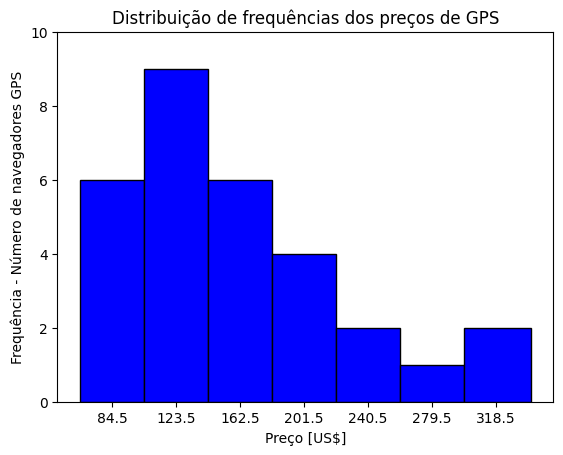

In [8]:
# construção do histograma
histograma = data.hist(bins=[inter.left for inter in intervalos]+[v_max],
                       color='blue', edgecolor='black', grid=False)
# atribuindo outros valor usando o set
histograma.set(xlabel='Preço [US$]', ylabel='Frequência - Número de navegadores GPS',
               title = 'Distribuição de frequências dos preços de GPS',
               xticks = nova_dist_freq['Pontos médios'],
               yticks = range(0,nova_dist_freq['Frequência'].max()+2,2))

## Como colocar a legenda da altura das barras

Use o comando _patches_ para conseguir a informação de todas as barras, comando abaixo:

>_barras_ = _histograma_.patches

Depois pegue o valor desejado para atribuir as barras, no caso, a frequência, comando abaixo:

>_freqs_ = _nova_dist_freq_['_Frequência_']

será necessário usar um laço e o comando zip para escrever o texto em todas as barras
Agora use o text e passe os parâmetros dele (_posTexto_, _altTexto_, _valBarra_, horizontalalignment ou ha = 'left/right/center', verticalalignment ou va ='center/top;bottom/baseline/center_baseline'), comando abaixo:

>for _barra_, _freq_ in zip(_barras_, _freqs_):

>   _altura_ = _barra_.get_height()

>   _histograma_.text(_barra_.get_x()+_barra_.get_width()/2, _altura_+0.1, _freq_, ha='center', va='bottom')

In [9]:
#obter informações das barras
barras = histograma.patches

#separar informações das frequencias
freqs = nova_dist_freq['Frequência']
#loop para cada barra
for barra, freq in zip(barras, freqs):
    altura = barra.get_height()
    histograma.text(barra.get_x()+barra.get_width()/2, altura+0.1,
                    freq, ha='center', va='bottom')

# **4. Construindo gráfico de polígono**

Voce precisará da biblioteca do matplotlib, comando abaixo:

>import matplotlib.pyplot as plt

Agora você precisa saber doi pontos fictícios para seu gráfico, você tem que subtrair a ampolitudo do menor valor para conseguir o valor da esquerda e somar a amplitude ao maior valor para conseguir o valor da direita, comandos abaixo:

Ponto fictício da esquerda:
>_fic_esq_ = [_pts_medios_[0]-_amplitude_]

Ponto fictício da direita:
>_fic_dir_ = [_pts_medios_[-1]+_amplitude_]

Agora você precisa criar as lista para os eixo x e y, vamos começar com as abscissas

Crie uma lista com todos os os pontos médio e fictícios, ficando na ordem fictício esquerdo, pontos médio e fictício direito, comando abaixo:

>_x_data_ = _fic_esq_ + list(_nova_dist_freq_['_Pontos médios_']) + _fic_dir_

Agore crie uma lista para o eixo das ordenadas, ondem tem o valores fictício, que serão zerados para poder gerar o polígono, e as frequências, comando abaixo:

>_y_data_ = [0] + list(_nova_dist_freq_['_Frequência_']) + [0]

Para gerar o gráfico você precisa usar o comando [plot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html), você precisa para passar os parâmetros do eixo X, eixo Y, [linha personalizadas](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle), etc.

Comando abaixo.




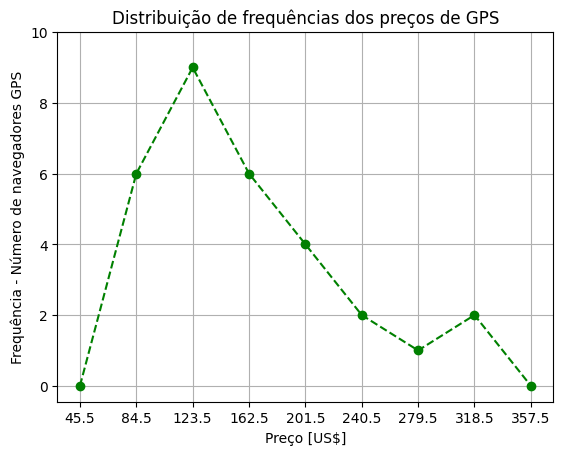

In [10]:
import matplotlib.pyplot as plt
# ponto ficticios
fic_esq = [pts_medios[0]-amplitude]
fic_dir = [pts_medios[-1]+amplitude]
# dados da tabela com pontos ficticios
x_data = fic_esq + list(nova_dist_freq['Pontos médios']) + fic_dir
y_data = [0] + list(nova_dist_freq['Frequência']) + [0]
# criação da tabela
plt.plot(x_data, y_data,'go--')
plt.xlabel('Preço [US$]')
plt.ylabel('Frequência - Número de navegadores GPS')
plt.title('Distribuição de frequências dos preços de GPS')
plt.xticks(x_data)
plt.yticks(range(0,nova_dist_freq['Frequência'].max()+2,2))
plt.grid()

# **Construção de histograma com frequencias relativas**

Vamos contruir o gráfico de histograma de frequencia com pesos.

Primeiro vamos importar o numpy, comando abaixo:

>import numpy as np

Depois iremos calcular os pesos para o gráfico, usando o comando [ones_like](https://numpy.org/doc/stable/reference/generated/numpy.ones_like.html), comando abaixo:

>weights = np.ones_like(data)/len(data)

Depois é só construir o gráfico com o parâmetro weights, comando abaixo

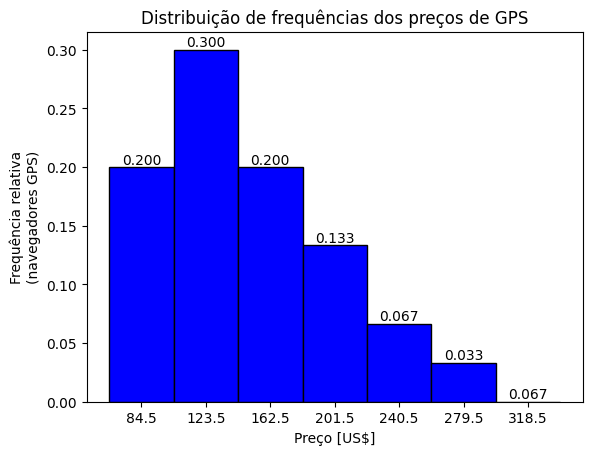

In [11]:
import numpy as np
#calculo dos pesos
weights = np.ones_like(data)/len(data)
#construção do gráfico
histograma = data.hist(bins=[inter.left for inter in intervalos]+
                       [nova_dist_freq['Classe'][n_classes-1].right],
                       color='blue', edgecolor='black', grid=False,
                       weights=weights)

#legendas
histograma.set(xlabel='Preço [US$]',
               ylabel='Frequência relativa\n(navegadores GPS)',
               title = 'Distribuição de frequências dos preços de GPS',
               xticks = nova_dist_freq['Pontos médios'])

#formatação do texto para as barras
barras = histograma.patches
freqs = nova_dist_freq['Frequência relativa']
for barra, freq in zip(barras, freqs):
    altura = barra.get_height()
    texto_freq = f'{freq:.3f}'
    histograma.text(barra.get_x()+barra.get_width()/2, altura,
                    texto_freq, ha='center', va='bottom')

# **Construção de gráfico de ogiva**
Para contruiemos um grafico de ogiva, é necessário importar o matplotlib, comando abaixo

import matplotlib.pyplot as plt

Esse gráfico consiste basicamente na soma da frequencia, tendo a frequencia acumulada como seu resultado.

Agora vamo pegar os dados para construir a tabela, comando abaixo

Eixo X:

>_x_data_ = [_nova_dist_freq_['_Classe_'][0].left] + [_ext_.right for _ext_ in _nova_dist_freq_['_Classe_']]

Eixo Y:
>_y_data_ = [0] + list(_nova_dist_freq_['_Frequência acumulada_'])

Observe que para o eixo y ele tem que sair do ponto 0

Depois para construir o problema tem que uasr o comando _plot_, comando abaixo:

>_ogiva_ = plt.plot(_x_data_, _y_data_,'go--')

Construção do grafico abaixo:

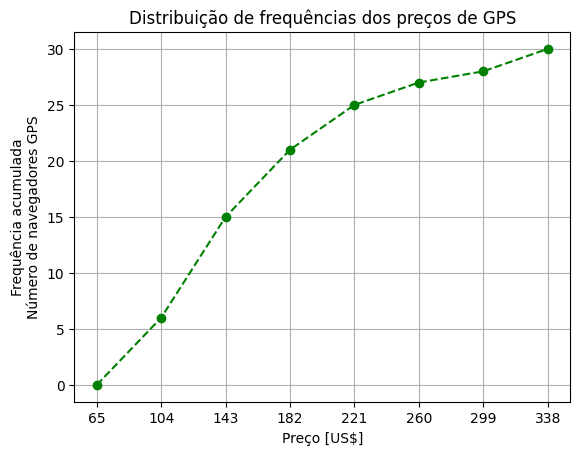

In [12]:
import matplotlib.pyplot as plt
# Construção dos dados
x_data = [nova_dist_freq['Classe'][0].left] + [ext.right for ext in nova_dist_freq['Classe']]
y_data = [0] + list(nova_dist_freq['Frequência acumulada'])
# Plotagem da ogiva, com diversos atributos
ogiva = plt
ogiva.plot(x_data, y_data,'go--')
ogiva.xlabel('Preço [US$]')
ogiva.ylabel('Frequência acumulada\nNúmero de navegadores GPS')
ogiva.title('Distribuição de frequências dos preços de GPS')
ogiva.xticks(x_data)
ogiva.grid()

# **Construção de gráfico de pizza**

Primeiro vamos criar os dados para o gráfico, ele tem que ser contruido usando uma lista 2 x n, depois tranformar em um _DataFrame_, comando abaixo:

>_dados_ = [['_Tecnólogo_',_942_],['_Bacharelado_',_1716_],['_Mestrado_',_731_],['_Doutorado_',_164_]]

>_tabela_ = pd.DataFrame(_dados_,_columns_=['_Título_','_Frequência_'])

Para criar o gráfico de setores, usamos o comando _pie_: comando abaixo

>pizza = plt.pie(tabela['Frequência'], labels=tabela['Título'],
                <br>&ensp; autopct='%1.1f%%', wedgeprops = {"edgecolor" : "black"},
                <br>&ensp; shadow=True)

Comando abaixo para montar o gráfico:

,Título,Frequência
0,Tecnólogo,942
1,Bacharelado,1716
2,Mestrado,731
3,Doutorado,164


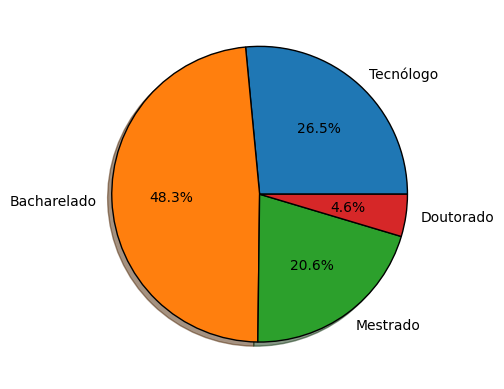

In [13]:
# conjunto de dados
dados = [['Tecnólogo',942],['Bacharelado',1716],
         ['Mestrado',731],['Doutorado',164]]
tabela = pd.DataFrame(dados,columns=['Título','Frequência'])
display(tabela)

# construção do gráfico
pizza = plt.pie(tabela['Frequência'], labels=tabela['Título'],
                autopct='%1.1f%%', wedgeprops = {"edgecolor" : "black"},
                shadow=True)

# **Construindo gráfico de pareto**

Primeiro construa o _DataFrame_ com os dados e depois adicione os indices para a tabela

>dados = pd.DataFrame({'Valores': [4.2, 15.1, 12.3, 1.1, 1.7]})
<br>_dados_.index = ['Erro\nAdm', 'Roubo\nfuncionários',
               'Roubo\nlojas', 'Desconhecida', 'Fraude\nvendas']

Depois coloque os dados em ordes decrescente, comando abaixo:

>_dados_ = _dados_.sort_values(by='Valores', ascending=False)

Depois crie uma coluna para colocar a porcentagem acumulada, comando abaixo:

>_dados_['PorcAcum'] = _dados_['Valores'].cumsum()/_dados_['Valores'].sum()*100

Depois você tem que criar os subplots da sua tabela para criar a segunda tabela, comando abaixo:

Primeiro gráfico:
>fig, pareto = plt.subplots()

Segundo gráfico dentro do primeiro:
>linha = pareto.twinx()

Depois crie as tabelas com os comando abaixo:

>pareto.bar(dados.index, dados['Valores'], color=cor_barra)
pareto.set(xlabel='Causas',
           <br>&ensp; ylabel='Bilhões de dólares',
           <br>&ensp; title = 'Principais causas de redução de estoque')

>linha = pareto.twinx()
<br>linha.plot(dados.index, dados['PorcAcum'], color=cor_linha,
           marker="o", ms=tam_linha)
<br> linha.yaxis.set_major_formatter(PercentFormatter())
<br> linha.tick_params(axis='y', colors=cor_linha)

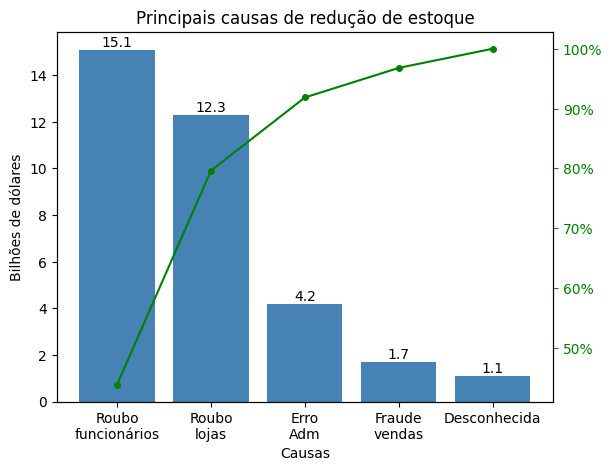

In [14]:
#conjunto de dados
dados = pd.DataFrame({'Valores': [4.2, 15.1, 12.3, 1.1, 1.7]})
dados.index = ['Erro\nAdm', 'Roubo\nfuncionários',
               'Roubo\nlojas', 'Desconhecida', 'Fraude\nvendas']
# organizando dados
dados = dados.sort_values(by='Valores', ascending=False)
# frequencia acumulada
dados['PorcAcum'] = dados['Valores'].cumsum()/dados['Valores'].sum()*100

# criando o grafico
from matplotlib.ticker import PercentFormatter
# Definição das cores
cor_barra = 'steelblue'
cor_linha = 'green'
tam_linha = 4
# construção dos graficos
fig, pareto = plt.subplots()
#grafico de barras
pareto.bar(dados.index, dados['Valores'], color=cor_barra)
pareto.set(xlabel='Causas',
           ylabel='Bilhões de dólares',
           title = 'Principais causas de redução de estoque')
# criando texto das barras
barras = pareto.patches
valores = dados['Valores']
for barra, valor in zip(barras, valores):
    altura = barra.get_height()
    pareto.text(barra.get_x()+barra.get_width()/2, altura,
                valor, ha='center', va='bottom')
# craiando sub grafico
linha = pareto.twinx()
linha.plot(dados.index, dados['PorcAcum'], color=cor_linha,
           marker="o", ms=tam_linha)
linha.yaxis.set_major_formatter(PercentFormatter())
linha.tick_params(axis='y', colors=cor_linha)

# **Dados emparelhado para construção de diagram de dispersão**

Para montar o diagrama de dispersão precisamos dos dados para e vamos obter ele a partir de um arquivo, usamos o arquivo csv e o comando _read_csv_.

Depois para montar o gráfico para construir, usamos o scatter, com os parâmetros x e y para os eixos, comando abaixo

>plt.scatter(iris['petallength'], iris['petalwidth'])
<br>plt.scatter(iris['sepallength'], iris['sepalwidth'])

Código da construção do gráfico:

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


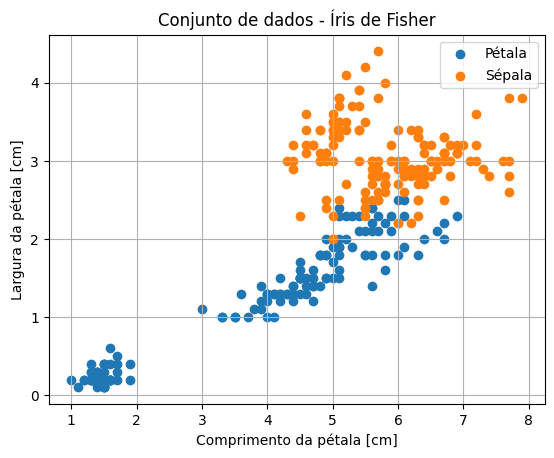

In [15]:
# leitura do arquivo
iris = pd.read_csv('iris.csv')
display(iris.head())
# construção dos dados
plt.scatter(iris['petallength'], iris['petalwidth'])
plt.scatter(iris['sepallength'], iris['sepalwidth'])
plt.xlabel('Comprimento da pétala [cm]')
plt.ylabel('Largura da pétala [cm]')
plt.title('Conjunto de dados - Íris de Fisher')
plt.legend(['Pétala', 'Sépala'])
plt.grid()

# **Exemplo de tabela com dois eixo temporais**

Uma tabela de assinantes de uma empresa de telefone

Código abaixo:

,Assinantes,Conta média
2002,134.6,47.42
2003,148.1,49.46
2004,169.5,49.49
2005,194.5,49.52
2006,219.7,49.30
2007,243.4,49.94
2008,262.7,48.54
2009,276.6,49.57
2010,292.8,47.47
2011,306.3,47.23


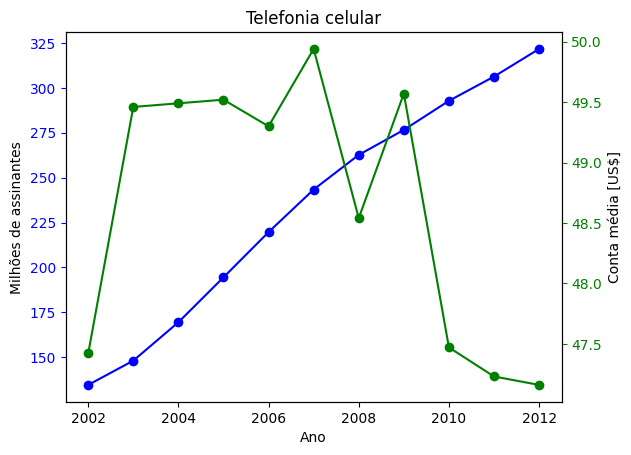

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# dados
dados = pd.DataFrame({'Assinantes': [134.6, 148.1, 169.5, 194.5, 219.7, 243.4,
                                     262.7, 276.6, 292.8, 306.3, 321.7],
                      'Conta média':[47.42, 49.46, 49.49, 49.52, 49.30, 49.94,
                                     48.54, 49.57, 47.47, 47.23, 47.16]})
dados.index = list(range(2002, 2013))
display(dados)
# criando as series
fig, assinantes = plt.subplots()
assinantes.plot(dados.index, dados['Assinantes'], 'bo-')
assinantes.set(xlabel='Ano',
           ylabel='Milhões de assinantes',
           title = 'Telefonia celular')
assinantes.tick_params(axis='y', colors='blue')
conta = assinantes.twinx()
conta.plot(dados.index, dados['Conta média'], 'go-')
conta.set(ylabel='Conta média [US$]')
conta.tick_params(axis='y', colors='green')

# **Outlier e sua influencia nos gráficos**

Outlier é um ou mais dados que estão fora a mais de 2/3 desvios padrões

Exemplo abaixo:

[Text(0.5, 0, 'Idade'),
 Text(0, 0.5, 'Frequência'),
 Text(0.5, 1.0, 'Distribuição de frequências das idades em uma turma de alunos'),

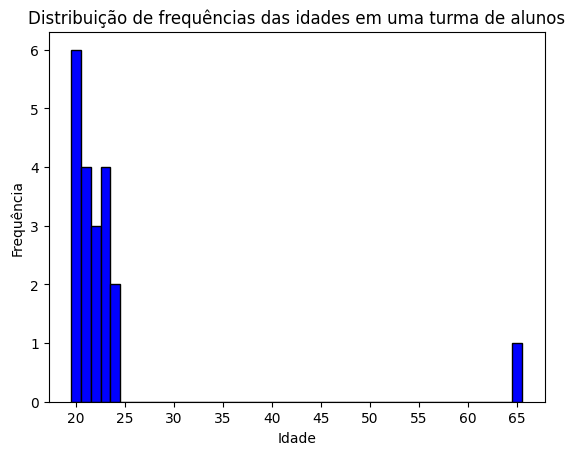

In [17]:
import pandas as pd
# dados
data = pd.Series([20, 20, 20, 20, 20, 20, 21,
                  21, 21, 21, 22, 22, 22, 23,
                  23, 23, 23, 24, 24, 65])

# grafico de histograma
amp_dist = data.max()-data.min()
eixo_x = list(range(data.min(), data.max()+1, 5))
classes = pd.interval_range(start=data.min()-0.5, end=data.max()+0.5, freq=1)
histograma = data.hist(bins=[classe.left for classe in classes]+[data.max()+0.5],
                       color='blue', edgecolor='black', grid=False)
# Inserção de atributos ao gráfico
histograma.set(xlabel='Idade', ylabel='Frequência',
               title='Distribuição de frequências das idades em uma turma de alunos',
               xticks=eixo_x)

# **Calculando medidas de tendencia central**

O pandas tem comando que ajudam a calcular os dados de maneira mais rápida sem ter que montar as contas, no caso, a média, mediana e moda, comando abaixo:

Média:
>media = data.mean()

Mediana:
>Mediana = data.median()

Moda:
moda = list(data.mode())

Exemplo em códigos abaixo:

In [18]:
# media, mediana e moda
media = data.mean()
print(f'A média da distribuição de idades é {media}.')
mediana = data.median()
print(f'A mediana da distribuição de idades é {mediana}.')
moda = list(data.mode())
print(f'A moda da distribuição de idades é {moda[0]}.')

A média da distribuição de idades é 23.75.
A mediana da distribuição de idades é 21.5.
A moda da distribuição de idades é 20.


# **Calculando médias ponderadas de duas formas**

para calcular medias ponderadas podemos fazer de duas formas, usando o comando pronto do numpy ou usando calculos no python, comandos abaixo:

import do numpy:
>import numpy as np

Média ponderada usando numpy:
>_media_ponderada_ = np.average(a=_notas_['_Notas_'], weights=_notas_['_Pesos_'])

Média ponderada usando calculo no python:
>_media_ponderada_ = sum(_notas_['_Notas_'] * _notas_['_Pesos_']) / _notas_['_Pesos_'].sum()

Código abaixo:

In [19]:
# dados
notas = pd.DataFrame({'Notas':[86, 96, 82, 98, 100],
                      'Pesos':[0.5, 0.15, 0.2, 0.1, 0.05]})
notas.index = ['Média do teste', 'Prova bimestral', 'Prova final',
               'Informática', 'Dever de casa']
display(notas)
# numpy
import numpy as np

media_ponderada = np.average(a=notas['Notas'], weights=notas['Pesos'])
print(f'A média final é {media_ponderada}.')

# calcuculo com python
media_ponderada = sum(notas['Notas'] * notas['Pesos']) / notas['Pesos'].sum()
print(f'A média final é {media_ponderada}.')

,Notas,Pesos
Média do teste,86,0.50
Prova bimestral,96,0.15
Prova final,82,0.20
Informática,98,0.10
Dever de casa,100,0.05


A média final é 88.6.
A média final é 88.6.


## Média ponderada por agrupamento

Usamos o comando _gruopby_ para juntar os dados, e o _apply_ para usar uma função criada

Código abaixo:

In [20]:
# função
def media_ponderada(dataframe, col_valores, col_pesos):
    valores = dataframe[col_valores]
    pesos = dataframe[col_pesos]
    return (valores*pesos).sum() / pesos.sum()
 
# dados
produtos = pd.DataFrame({'Nome_item': ['Chocolate', 'Chocolate', 'Chocolate',
                                       'Biscoito', 'Biscoito', 'Biscoito',
                                       'Sorvete', 'Sorvete', 'Sorvete'],
                          'Preço': [90, 50, 86, 87, 42, 48, 68, 92, 102],
                          'Peso': [4, 2, 3, 5, 6, 5, 3, 7, 5]})
display(produtos)
# media ponderada por agrupamento
medias = produtos.groupby('Nome_item').apply(media_ponderada, 'Preço', 'Peso')
display(medias)

for indice in range(len(medias)):
  print(f'Preço médio do {medias.index[indice]}: {medias[indice]:.2f}')

,Nome_item,Preço,Peso
0,Chocolate,90,4
1,Chocolate,50,2
2,Chocolate,86,3
3,Biscoito,87,5
4,Biscoito,42,6
5,Biscoito,48,5
6,Sorvete,68,3
7,Sorvete,92,7
8,Sorvete,102,5


Nome_item
Biscoito     57.937500
Chocolate    79.777778
Sorvete      90.533333
dtype: float64

Preço médio do Biscoito: 57.94
Preço médio do Chocolate: 79.78
Preço médio do Sorvete: 90.53


## Média da distribuição de frequencia no exemplo de GPS

In [21]:
from math import ceil
# Conjunto de dados
data = pd.Series([128, 100, 180, 150, 200, 90, 340, 105, 85, 270,
                  200, 65, 230, 150, 150, 120, 130, 80, 230, 200,
                  110, 126, 170, 132, 140, 112, 90, 340, 170, 190])

# Valores máximo, mínimo e número de classes
v_max = data.max()
v_min = data.min()
n_classes = 7
# Distribuição de frequência
dist_freq = data.value_counts(bins=7).sort_index()
# Reconfiguração do conjunto de dados: Series para DataFrame
nova_dist_freq = pd.DataFrame(dist_freq)
nova_dist_freq = nova_dist_freq.reset_index()
nova_dist_freq.columns = ['Classe', 'Frequência']
# Cálculo da amplitude de classe, com respectivos intervalos de classe
amplitude = ceil((v_max-v_min)/n_classes)
intervalos = pd.interval_range(start=v_min, end=v_max+amplitude, freq=amplitude)
# Atribuição dos intervalos para a coluna Classe
nova_dist_freq['Classe'] = intervalos
# Cálculo dos pontos médios das classe
pts_medios = [inter.mid for inter in intervalos]
# Inserção da coluna Pontos médios
nova_dist_freq['Pontos médios'] = pts_medios
display(nova_dist_freq)
# Cálculo da preço médio
obs = len(data)
preco = (nova_dist_freq['Frequência']*nova_dist_freq['Pontos médios']).sum()/obs
print(f'O preço médio de um navegador GPS é de US${preco:.2f}.')

,Classe,Frequência,Pontos médios
0,"(65, 105]",6,85.0
1,"(105, 145]",9,125.0
2,"(145, 185]",6,165.0
3,"(185, 225]",4,205.0
4,"(225, 265]",2,245.0
5,"(265, 305]",1,285.0
6,"(305, 345]",2,325.0


O preço médio de um navegador GPS é de US$162.33.


# **Filtrando dados em dois sentido**

PRimeiro use os dados que são compatives com isso, no caso, serão utilizados dados de notas de provas de alunos

Código abaixo:

In [22]:
import pandas as pd
import numpy as np
 
# Conjunto de dados
tabela = pd.DataFrame({'Aluno':['Alisa','Bobby','Cathrine','Madonna',
                              'Rocky','Sebastian','Jaqueline','Rahul',
                              'David','Andrew','Ajay','Teresa'],
                      'P1':[62,47,55,74,31,77,85,63,42,32,71,57],
                      'P2':[89,87,67,55,47,72,76,79,44,92,99,69],
                      'P3':[56,86,77,45,73,62,74,89,71,67,97,68]})
display(tabela)

,Aluno,P1,P2,P3
0,Alisa,62,89,56
1,Bobby,47,87,86
2,Cathrine,55,67,77
3,Madonna,74,55,45
4,Rocky,31,47,73
5,Sebastian,77,72,62
6,Jaqueline,85,76,74
7,Rahul,63,79,89
8,David,42,44,71
9,Andrew,32,92,67


## Vamos calcular alguns dados para um resumo melhor:

Use o _numeric_only = True_ para ele calcular apenas com os valores numéricos 

Média:
>_est_provas_ =pd.DataFrame(_tabela_.mean(axis=0, numeric_only=True), columns=['Média'])

Mediana:
>_est_provas_['Mediana'] = _tabela_.median(axis=0, numeric_only=True)

Desvio Padrão:
>_est_provas_['DesvPad'] = _tabela_.std(axis=0, ddof=0, numeric_only=True)

Amplitude:
>_amps_ = [_tabela_['P'+str(i)].max() - _tabela_['P'+str(i)].min() for i in range(1,4)]

Valor comparado:
>_homogenea_ = _est_provas_.loc[_est_provas_['DesvPad'] == _est_provas_['DesvPad'].min()]

Usando um metodo para calcular todas as colunas mais rapido:
>_tabela_.agg(['mean', 'std', 'median'])


In [23]:
# fazendo a tabela
est_provas =pd.DataFrame(tabela.mean(axis=0, numeric_only=True), columns=['Média'])
est_provas['Mediana'] = tabela.median(axis=0, numeric_only=True)
est_provas['DesvPad'] = tabela.std(axis=0, ddof=0, numeric_only=True)
amps = [tabela['P'+str(i)].max() - tabela['P'+str(i)].min() for i in range(1,4)]
est_provas['Amplitudes'] = amps
display(est_provas)

# prova mais homogenea
print('*** Prova mais homogênea ***')
homogenea = est_provas.loc[est_provas['DesvPad'] == est_provas['DesvPad'].min()]
display(homogenea)

# Usando o método agg (nesse caso, o método std é usado com ddof=1)
print('Uso do método agg')
tabela.agg(['mean', 'std', 'median'])

,Média,Mediana,DesvPad,Amplitudes
P1,58.000000,59.5,16.703293,54
P2,73.000000,74.0,16.901676,55
P3,72.083333,72.0,13.744443,52


*** Prova mais homogênea ***


,Média,Mediana,DesvPad,Amplitudes
P3,72.083333,72.0,13.744443,52


Uso do método agg


C:\Users\Pichau\AppData\Local\Temp\ipykernel_3496\2253061551.py:16: FutureWarning: ['Aluno'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  tabela.agg(['mean', 'std', 'median'])


,P1,P2,P3
mean,58.000000,73.000000,72.083333
std,17.446021,17.653225,14.355603
median,59.500000,74.000000,72.000000


In [24]:
# mesma tabela mas agora mostrando os alunos
est_alunos = pd.DataFrame(tabela.mean(axis=1, numeric_only=True), columns=['Média'])
est_alunos.index = list(tabela['Aluno'])
est_alunos['DesvPad'] = list(tabela.std(axis=1, ddof=0, numeric_only=True))
display(est_alunos)

# Encontrando o melhor aluno
print('*** Melhor Aluno ***')
melhor = est_alunos.loc[est_alunos['Média'] == est_alunos['Média'].max()]
display(melhor)

# Encontrando o aluno mais consistente
print('*** Aluno mais consistente ***')
consistente = est_alunos.loc[est_alunos['DesvPad'] == est_alunos['DesvPad'].min()]
display(consistente)

,Média,DesvPad
Alisa,69.000000,14.352700
Bobby,73.333333,18.624953
Cathrine,66.333333,8.993825
Madonna,58.000000,12.027746
Rocky,50.333333,17.307673
Sebastian,70.333333,6.236096
Jaqueline,78.333333,4.784233
Rahul,77.000000,10.708252
David,52.333333,13.224556
Andrew,63.666667,24.608038


*** Melhor Aluno ***


,Média,DesvPad
Ajay,89.0,12.754084


*** Aluno mais consistente ***


,Média,DesvPad
Jaqueline,78.333333,4.784233


## Média e desvio padrão

Calculando média amostral e desvio padrão amostral

In [26]:
# Colunas iniciais da distribuição de frequência
dados = pd.DataFrame({'Classe': ['0-4', '5-9', '10-14', '15-19',
                                 '20-24', '25-29', '30 ou +'],
                      'Freq (f)': [5, 12, 24, 17, 16, 11, 5],
                      'Pt. médio (x)':[2, 7, 12, 17, 22, 27, 32]})
# Coluna valor * frequência
dados['x*f'] = dados['Freq (f)']*dados['Pt. médio (x)']
# Cálculo da média
media_dados = dados['Pt. médio (x)'].mean()
# Coluna valor - média
dados['x-xbarra'] = dados['Pt. médio (x)'] - media_dados
# Coluna (valor - média)^2
dados['(x-xbarra)^2'] = dados['x-xbarra']**2
# Coluna (valor - média)^2 * frequência
dados['(x-xbarra)^2*f'] = dados['(x-xbarra)^2']*dados['Freq (f)']
display(dados)
# Cálculo da média amostral
obs = dados['Freq (f)'].sum()
media_am = dados['x*f'].sum()/obs
print(f'Média amostral: {media_am:.1f} horas')
# Cálculo do desvio padrão amostral
desv_pam_am = (dados['(x-xbarra)^2*f'].sum()/(obs-1))**(1/2)
print(f'Desvio padrão amostral: {desv_pam_am:.1f} horas')

,Classe,Freq (f),Pt. médio (x),x*f,x-xbarra,(x-xbarra)^2,(x-xbarra)^2*f
0,0-4,5,2,10,-15.0,225.0,1125.0
1,5-9,12,7,84,-10.0,100.0,1200.0
2,10-14,24,12,288,-5.0,25.0,600.0
3,15-19,17,17,289,0.0,0.0,0.0
4,20-24,16,22,352,5.0,25.0,400.0
5,25-29,11,27,297,10.0,100.0,1100.0
6,30 ou +,5,32,160,15.0,225.0,1125.0


Média amostral: 16.4 horas
Desvio padrão amostral: 7.9 horas


# Comparando conjuntos de dados
Comparando usando Média, desvio padrão e coeficiente de variação

In [27]:
# Conjunto de dados
salarios = pd.DataFrame({'Dallas': [41.6, 50.0, 49.5, 38.7, 39.9,
                                    45.8, 44.7, 47.8, 40.5, 44.3],
                         'New York': [45.6, 41.5, 57.6, 55.1, 59.3,
                                      59.0, 50.6, 47.2, 42.3, 51.0]})
display(salarios)

# Cálculo das médias, desvios padrão e coeficiente de variação
est_sal =pd.DataFrame(salarios.mean(axis=0, numeric_only=True), columns=['Média'])
est_sal['DesvPad'] = salarios.std(axis=0, ddof=0, numeric_only=True)
est_sal['CV'] = est_sal['DesvPad']/est_sal['Média']*100
display(est_sal)


,Dallas,New York
0,41.6,45.6
1,50.0,41.5
2,49.5,57.6
3,38.7,55.1
4,39.9,59.3
5,45.8,59.0
6,44.7,50.6
7,47.8,47.2
8,40.5,42.3
9,44.3,51.0


,Média,DesvPad,CV
Dallas,44.28,3.829308,8.647940
New York,50.92,6.347409,12.465453
